# (Absolutely Silly) Image Captioning

The projct is to be though of as a hobby and educational project rather than anything else. 


Generating captions for images using [Mask R-CNN](https://github.com/matterport/Mask_RCNN) and [Google Conceptual Captions (GCC)](https://github.com/google-research-datasets/conceptual-captions) dataset. 


In this demo, the `AbsolutelySillyImageCaptioning` folder is placed under `samples` subfolder in the Mask R-CNN project structure. To lunch the system a `gcc_train.tsv` has to be put in the `data` folder.


## Pathing

In [1]:
import pandas as pd
import os, sys
ROOT = os.path.abspath("../")
print(ROOT)
# sys.path.append(ROOT)
# print(sys.path)

/home/mccastles/Workspace/PW/PD/Mask_RCNN/samples/ImageCaptioning


## Using Mask R-CNN

[Mask R-CNN](https://github.com/matterport/Mask_RCNN) network is used to recognize and classify objects on the image. The exaple weights downloaded from the repo allow for the recognition of the 80 classes of objects. The FeatureExtractor module is a slightly changed demo from the Mask R-CNN repo.

In [2]:
import FeatureExtractor

/home/mccastles/miniconda3/envs/data/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mccastles/miniconda3/envs/data/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mccastles/miniconda3/envs/data/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mccastles/miniconda3/envs/data/lib


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Classes recognized by a default pre-trained Mask R-CNN

'BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
'bus', 'train', 'truck', 'boat', 'traffic light',
'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
'kite', 'baseball bat', 'baseball glove', 'skateboard',
'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
'teddy bear', 'hair drier', 'toothbrush'

In [3]:
IMG_PATH = 'imgs/room12.jpg'

Processing 1 images
image                    shape: (329, 598, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[135 383 296 562]
 [ 83 239 169 281]
 [150 242 172 274]]
3
[135 383 296 562]
[ 83 239 169 281]
[150 242 172 274]


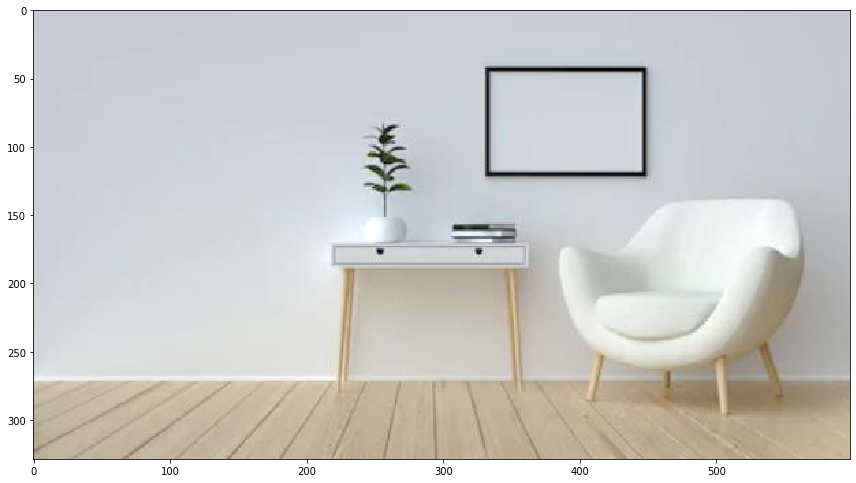

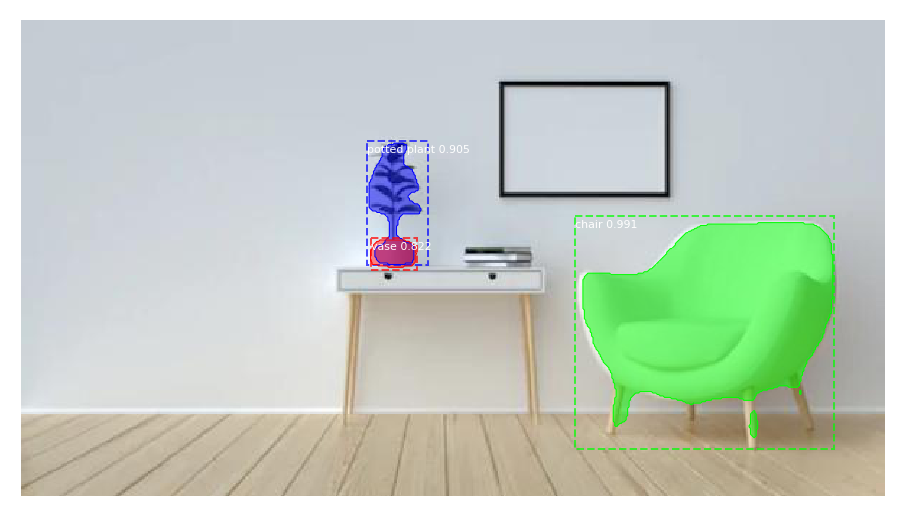

0 57 chair
1 59 potted plant
2 76 vase


In [4]:
features = FeatureExtractor.extract(f'{ROOT}/{IMG_PATH}')

## Parsing Labels

Preparing labels for the future. 

1. Excluding the word `'person'` from the labels list and counting the number of its occurences.


2. Changing some labels to increase the chances of finding the sentence (i.e `'dining table'` will produce `'table'`).


3. Extracting unique labels.

In [5]:
%run Parsers.ipynb


Imported functions for use outside:

	personification( how_many_persons, peoples, BoW, clusters )

	cluster_added( BoW, ll_uniq, clusters )

	clustering( ll )

	parse_labels( ll_org )




In [6]:
ll, ll_uniq, how_many_persons = parse_labels( features['labels'] )
ll, ll_uniq, how_many_persons

(['chair', 'plant', 'vase'], ['chair', 'plant', 'vase'], 0)

## Clustering

A process of gathering objects into groups.

1. Counting the number of appearances among predicted labels and adding surrounding words (i.e `['bed', 'bed']` will produce `'a pair of beds'`)


2. Those representations will be used during the sentence stitching, although during the context building phase only the unique labels are used.


3. Surrounding words are added ad hoc (todo?)

In [7]:
clusters = clustering( ll )
clusters

{'vase': 'a vase', 'plant': 'a plant', 'chair': 'a chair'}

## Building Context

Context of a label is a number of words that can appear in a sentence with this label. As a dataset of sentences [Google Conceptual Captions (GCC)](https://github.com/google-research-datasets/conceptual-captions) is used. The photos from the dataset are not used themselves (todo?).

1. To build a context for a label (i.e `'vase'`), a subset of sentences that contain the label is extracted, tokenized and sliced into parts of speech ([nltk.pos_tag](http://www.nltk.org/book/ch05.html)).


2. Then those sentences with 2 nouns are selected and the pair of nouns is extracted for each sentence (i.e `['vase, 'flowers']`).


3. Pairs are hashed (in a way that `hash([A, B]) == hash([B, A])`) and counted, then the probability of each particular hash is calculated.


4. This way we know that `'flowers'` is the most probable word in a 2-nouns sentence which contain the word `'vase'`.


5. Some words like `'background'` or `'image'` are excluded (the dataset contains a lot of images of the objects isolated on a white background).


6. We also "remove a tail", which means that we get rid of the words with the lowest probability (those are the words that appeared in exactly one sentence with the original label). Removing a tail twice decreases the probability of trash words in our caption.


6. The process is repeated for the 3-nouns sentences (which seem to add more valuable context).




In [8]:
%run ContextBase.ipynb


Imported functions for use outside:

	get_full_context( class_list, rt=0, v=True )

	build_bow( label_list, cb_dict, v=True )

	find_all_occ( label_list )




In [9]:
cb_dict = get_full_context( ll_uniq, rt=2, v=True )


chair orig samples: 597 

Filtered 183 pairs
Now minimum freq is 0.0033500837520938024
Remaining samples: 414 

Filtered 94 pairs
Now minimum freq is 0.005025125628140704
Remaining samples: 320 

Built context for "chair": 597 sentences, 53 unique nouns.

plant orig samples: 1021 

Filtered 248 pairs
Now minimum freq is 0.0019588638589618022
Remaining samples: 773 

Filtered 156 pairs
Now minimum freq is 0.002938295788442703
Remaining samples: 617 

Built context for "plant": 1021 sentences, 57 unique nouns.

vase orig samples: 172 

Filtered 62 pairs
Now minimum freq is 0.011627906976744186
Remaining samples: 110 

Filtered 26 pairs
Now minimum freq is 0.01744186046511628
Remaining samples: 84 

Built context for "vase": 172 sentences, 10 unique nouns.

chair orig samples: 1150 

Filtered 704 pairs
Now minimum freq is 0.0017391304347826088
Remaining samples: 446 

Filtered 158 pairs
Now minimum freq is 0.0026086956521739132
Remaining samples: 288 

Built context for "chair": 1150 sen

In [10]:
# Frequency distribution for words with the word "bed"
# cb_dict['2']['bed']['freq_dict']
# cb_dict['3']['bed']['freq_dict']

## Finding new Labels (from the Context)

Now we extend our original label list with some new words, which are not recognized on the image, but are instead deduced from the context. We accumulate them in an improvised Bag of Words.

1. In a cell below, the label list `['bed', 'book']` is extended by the label `'room'`.


2. To build a Bag of Words, we first find the intersection among `'bed'` context and `'book'` context (for 2-nouns context and 3-nouns context seperately)


3. Then the probabilities of meeting a new word with `'bed'` and `'book'` are multiplied. The whole set is then sorted by the mutual probability to reveal the most probable intersection.


4. The barplots depict the probability of the occurence of a new word given two (or three) original labels.


5. Words connected to people (`'man'`, `'woman'`, `'person'`, etc.) appear in a lot of sentences, thus accumulated in a seperate set called peoples (processed later).


6. The word `'room'` has the highest probability to appear on the image together with `'bed'` and `'book'`, thus added to the Bag of Words.


7. After BoW is built, newcoming labels receive their entries in a clustering dictionary, always appearing in a singular form.



chair, plant, vase (Context Base 2)
  mutual_label  freq_with_chair  freq_with_plant  freq_with_vase  mutual_freq
0       person         3.852596         1.273262        2.906977    14.259775


chair, plant, vase (Context Base 3)
  mutual_label  freq_with_chair  freq_with_plant  freq_with_vase  mutual_freq
0        woman         0.608696         0.253646        1.052632     0.162519

Vote: set()
Top Frequency: {'person'}


chair, plant (Context Base 2)
  mutual_label  freq_with_chair  freq_with_plant  mutual_freq
3       person         3.852596         1.273262     4.905363
6        woman         2.345059         0.293830     0.689048
4         home         0.837521         0.489716     0.410147
1       window         0.837521         0.391773     0.328118
0        house         1.005025         0.293830     0.295306
5        steps         0.670017         0.391773     0.262494
2         name         0.670017         0.293830     0.196871
7        grass         0.670017         0.293

({'chair', 'flowers', 'plant', 'table', 'vase'}, {'artist', 'person'})

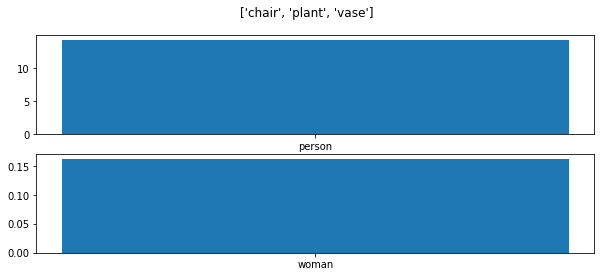

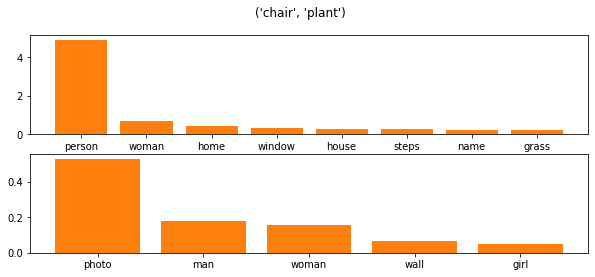

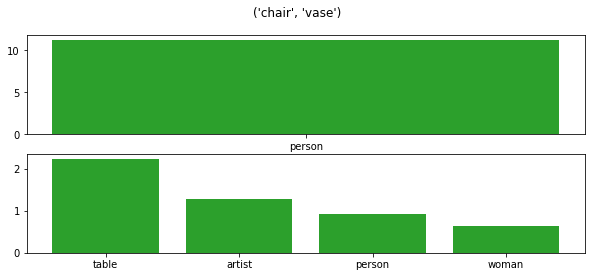

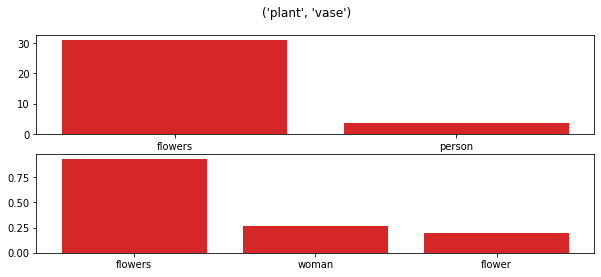

In [11]:
BoW, peoples = build_bow( ll_uniq, cb_dict, v=True )
BoW, peoples

In [12]:
cluster_added( BoW, ll_uniq, clusters )
clusters

{'vase': 'a vase',
 'plant': 'a plant',
 'chair': 'a chair',
 'flowers': 'a flowers',
 'table': 'a table'}

## Personification

1. If the system remembers from the parsing that the person is present on the picture, it's gonna try to ascertain their gender, based on statistics.


2. Though might not be connected to a real world, the system concludes from the GCC dataset, that it's more probable for a `'woman'` to appear on the picture together with `'bed'`, `'book'` and `'room'`.

In [13]:
personification( how_many_persons, peoples, BoW, clusters )

BoW, clusters

({'chair', 'flowers', 'plant', 'table', 'vase'},
 {'vase': 'a vase',
  'plant': 'a plant',
  'chair': 'a chair',
  'flowers': 'a flowers',
  'table': 'a table'})

## Building Junctions

Junctioning is a way to ascertain a relationships between the labels present. Two labels can found themselves in one of the three raltionships:

* Parent: ``'a table with a vase'`` ('table' is a Parent to 'vase'), ``'a vase on a table'`` ('table' is a Parent to 'vase')


* Child: ``'a vase on a table'`` ('vase' is a Child to 'table')


* Sibling: ``'a cup and a vase on a table'`` ('vase' is a Sibling to 'cup', 'cup' is a Sibling to 'vase')


The matrix is built by determining a relation between a pair of labels to build a triangle matrix, then mirrors it to complete the square matrix.


The relationship between labels A and B in a sentence ``'a cat lies on a bed'`` is determined by:



1. Selecting all the sentences with the words `'cat'` and `'bed'` in them.


2. Extracting from the sentence (after the tokenizing and PoS-tagged) all of the words between `'cat'` and `'bed'`: ``[('lies', 'VBZ'), ('on', 'IN'), ('a', 'DT')]``


3. Words like 'on' or 'in' tell that the first word (`'cat'`) is a Child. Other words like 'with' tell that the first word is a Parent. Words like 'and' vote for Sibling.


4. The total number of votes per relationship is calculated and a final vote is decided (usually by the most common category). 


5. If a GCC dataset does not contain a single sentence with the two labels, then they're automatically considered Siblings.


6. `Final vote for ('bed', 'book'): Parent` means that `bed` is considered a Parent to `book`.


In [14]:
%run Junctions.ipynb


Imported functions for use outside:

	build_caption_tree( matrix )

	create_realtion_matrix( fao, label_list, v=False )




In [15]:
mat = create_realtion_matrix( find_all_occ, list(BoW), v=False )
mat

/home/mccastles/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mccastles/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Final vote for ('flowers', 'plant'): Child
Final vote for ('flowers', 'chair'): Child
Final vote for ('flowers', 'table'): Child
Final vote for ('flowers', 'vase'): Child
Final vote for ('plant', 'chair'): Sibl
Final vote for ('plant', 'table'): Sibl
Final vote for ('plant', 'vase'): Child
Final vote for ('chair', 'table'): Sibl
Final vote for ('chair', 'vase'): Sibl
Final vote for ('table', 'vase'): Parent


,flowers,plant,chair,table,vase
flowers,Is,Parent,Parent,Parent,Parent
plant,Child,Is,Sibl,Sibl,Parent
chair,Child,Sibl,Is,Sibl,Sibl
table,Child,Sibl,Sibl,Is,Child
vase,Child,Child,Sibl,Parent,Is


## Building a Tree

A Tree is an attempt to build some sort of hierarchy of objects on a picture to distribute nouns into groups that will eventually be used to stitch sentences.


1. First we count the number of Children ('cn' column) for each row in a relationship matrix. The labels with the highest 'cn' are considered roots (the tree has multiple roots in this case).


2. The number of distinct 'cn' values is the number of sentences in a final caption.


3. The parent of a particular label in non-root sentences is determined during a stitching phase.

In [16]:
tree = build_caption_tree( mat )

In [17]:
mat

,flowers,plant,chair,table,vase,cn
flowers,Is,Parent,Parent,Parent,Parent,0
plant,Child,Is,Sibl,Sibl,Parent,1
chair,Child,Sibl,Is,Sibl,Sibl,1
table,Child,Sibl,Sibl,Is,Child,2
vase,Child,Child,Sibl,Parent,Is,2


In [18]:
tree

{2: ['table', 'vase'], 1: ['plant', 'chair'], 0: ['flowers']}

## Stitching a Caption

The process of building the caption itself might take a long time (max 15 minutes) if the number of words in the BoW is high.


1. First we build a root sentence, taking into account the number of nouns in it. If it's a single noun root, it will decribe the objects in a second sentence (i.e `'a room with a table and a vase'`) and the second sentence is skipped.


2. The follow-up sentences are built by first determining a Parent for each noun in a previous sentence. If a sentence contains `'vase'` and `'cat'`, then the word `'flowers'` in the next sentence is more probable to make `'vase'` its Parent. The decision is based on a total number of sentences containing pairs `['vase', 'flowers']` and `['cat', 'flowers']`.


3. We then look for the most common verbs between the two nouns, and for the most common adjective for each one. Then their representation from clustering show up to form a human-readable (well, not *always*) sentence.

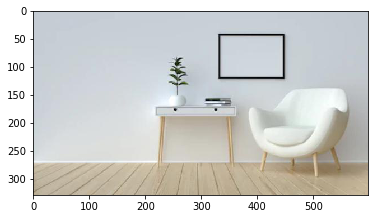

In [19]:
plt.imshow(io.imread( '../'+IMG_PATH )); plt.show()

In [20]:
%run Stitcher.ipynb

stitch( tree, find_all_occ, clusters )



Imported functions for use outside:

	stitch( tree, fao, clusters )




'The image of a wooden table and a red vase.  A green plant pulls potted on the table. A young chair is set with the table. A beautiful flowers is covered of the plant.'

## The main problems still remaining


* Long waiting time for the large number of final labels (caused by an inefficient code in most of the places).


* Miscalculating during the determining of relationships between the labels.


* Too artificial sentences (caused by a silly way to determine adjectives and verbs).


* Still too much garbage labels in a sentence despite this labels not being connected logically to the rest.